# Hierarchical Clustering

## Preparation

In [1]:
#load packages and clean data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pip install pca
houses = pd.read_csv("kc_house_data_processed.csv")

#print head of data
houses.head(5)

Note: you may need to restart the kernel to use updated packages.


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0


## Standardize Data

The data is standardized so the all variables have a mean of zero and a standard deviation of one.

In [2]:
#Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

#list with all features except the price
features=list(houses.columns)
features.remove('price')
print(features)

# feature values
x = houses.loc[:, features].values

# price values
y = houses.loc[:,['price']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x[0])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated']
[-0.41122525 -1.52794577 -0.98938739 -0.2279585  -0.91533514 -0.08695551
 -0.30540478 -0.63006426 -0.56084535 -0.73825827 -0.66125836 -0.54471554
 -0.35272803 -0.30570268 -0.94394549 -0.26049304 -0.20990652]


## Finding Dendrograms 

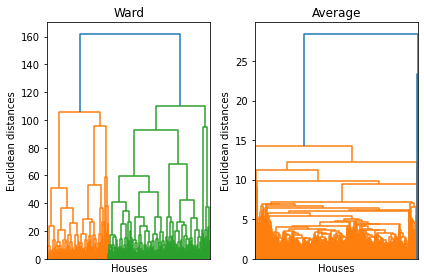

In [3]:
import scipy.cluster.hierarchy as sch

#take a random sample of 5000 observations 
np.random.seed(0)
randomindices=np.random.choice(x.shape[0], size=5000, replace=False)
x_sample=x[randomindices,]

#clustering
ward=sch.linkage(x_sample, method  = "ward")
average=sch.linkage(x_sample, method  = "average")

#Dendrogram with ward method
plt.subplot(1, 2, 1)
dendrogram = sch.dendrogram(ward)
plt.title('Ward')
plt.xlabel('Houses')
plt.ylabel('Euclidean distances')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.tight_layout()

#Dendrogram with average method
plt.subplot(1, 2, 2)
dendrogram = sch.dendrogram(average)
plt.title('Average')
plt.xlabel('Houses')
plt.ylabel('Euclidean distances')
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.tight_layout()

plt.savefig('../Paper/Hierarchical.png')
plt.show()

## Where to cut?

Use elbow method to see where to cut. 

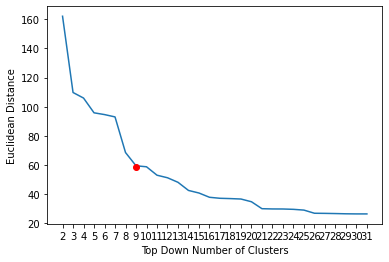

In [4]:
#last 30 fusions and distances between the clusters using ward method
last = ward[-30:, 2]

#reverse order of distance so that the last fusion appears first and therefore we could interpret it as first split
last_rev = last[::-1]

#Indeces indicating the number of cluster existing after each split
idxs = np.arange(2, len(last)+2)

#plot elbow diagram
plt.plot(idxs, last_rev)
plt.xticks(idxs)
plt.ylabel('Euclidean Distance')
plt.xlabel('Top Down Number of Clusters')
plt.plot(9, last_rev[8], 'ro', label='Point')
plt.savefig('../Paper/ElbowPlot.png')

plt.show()

The best split would be at three clusters because there is the first kink but I will go with 9 clusters since there is another kink and it makes more sense to have more then two house categories

## Categories Data 

In [5]:
from scipy.cluster.hierarchy import fcluster

#compute clusters for all observations
ward_all=sch.linkage(x, method  = "ward")

#Numbe of clusters to use to categorize data
k=9

#one category per observation
clusters = fcluster(ward_all, k, criterion='maxclust')
clusterDf=pd.DataFrame(data=clusters, columns=['Category'])

#final data frame with all features plus category
finalDf=pd.concat([houses, clusterDf],axis = 1)
finalDf.head(5)
finalDf.tail(5)

#save new data frame with categories for next analysis
finalDf.to_csv('kc_house_data_categories.csv',sep=",", index=False)


## Describe House Categories

In [6]:
#mean of all variables by category
meansByCategory=finalDf.groupby('Category').mean()
meansByCategory

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated
Category,,,,,,,,,,,,,,,,,,
1,7.102902e+05,3.454976,2.419431,2247.700237,10910.137441,1.503555,0.0,0.464455,3.216825,7.689573,1827.084123,420.616114,1939.072275,47.584489,-122.262385,1932.159953,9724.283175,1.000000
2,3.730070e+05,2.727369,1.327073,1280.372019,7773.497995,1.120279,0.0,0.006752,3.542309,6.653302,1144.071745,136.300274,1943.253007,47.575882,-122.295292,1460.124921,7274.285714,0.000000
3,7.726330e+05,3.520538,2.507842,2497.413742,12732.537715,1.431665,0.0,2.387603,3.576550,8.190441,1878.388350,619.025392,1963.056759,47.569274,-122.262129,2423.250187,11027.016430,0.000000
4,5.649929e+05,3.919176,2.436386,2315.981254,9936.476644,1.158574,0.0,0.031653,3.790719,7.553165,1480.945298,835.035956,1958.291334,47.592267,-122.256596,1987.175169,9101.360479,0.000000
5,3.925752e+05,3.161984,2.042738,1714.184997,24024.257621,1.074268,0.0,0.013150,3.479079,7.250747,1535.470711,178.714286,1972.270771,47.514381,-122.147261,1809.736999,18430.956665,0.005977
6,1.643320e+06,3.290123,2.827160,3133.771605,25447.777778,1.645062,1.0,3.765432,3.537037,8.753086,2458.555556,675.216049,1962.061728,47.537243,-122.282043,2662.623457,22458.753086,0.253086
7,6.297442e+05,3.310044,2.624454,2714.742358,284734.908297,1.628821,0.0,0.545852,3.310044,8.174672,2484.196507,230.545852,1984.589520,47.466843,-122.051096,2357.877729,211129.751092,0.013100
8,8.882260e+05,4.148083,3.287372,3414.970102,15838.356665,1.972037,0.0,0.185016,3.139993,9.346465,3157.568062,257.402040,1996.616954,47.577935,-122.131563,2956.807598,14111.744284,0.001055
9,4.450385e+05,3.267232,2.700476,1953.044711,7317.876837,2.099565,0.0,0.002898,3.122335,7.782033,1902.927965,50.116746,1998.253985,47.542409,-122.183871,1900.799627,7103.885531,0.000000


PCA Analysis to see what the categories stand for

(9, 18)
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


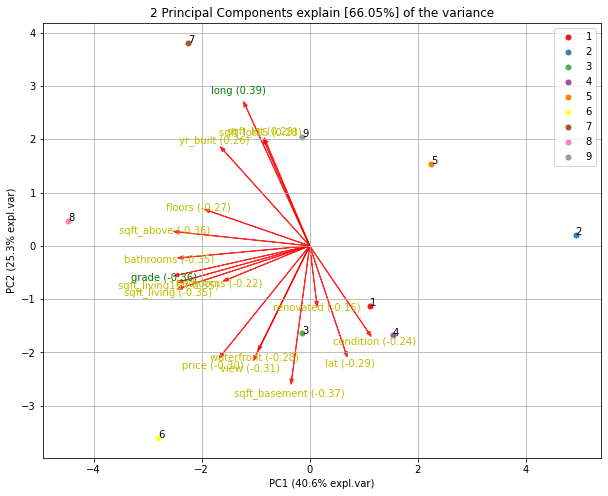

In [7]:
# Standardize the means per category
from sklearn.preprocessing import StandardScaler
from pca import pca

#list with all features except the price
features=list(meansByCategory.columns)

#index 
index=meansByCategory.index

#include price now to see where the categories are also located accoding to price
x = meansByCategory.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


# transform back to data frame 
X=pd.DataFrame(data=x, columns=features, index=index)
print(X.shape)

# Reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Create biplot
fig, ax = model.biplot(n_feat=18, d3=False, label=True)
fig.savefig('../Paper/PCAHouseCategories.png')

